## Use of AI

*   Used it to break the task down
*   Used it to suggest code for downloading the world map data



In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cs 215/Project 4/freedom-of-expression-index.csv")
df.head()
#when gdrive doesnt work, load it locally
df = pd.read_csv("freedom-of-expression-index.csv")

In [ ]:

# download the world map data
!wget https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip

# Load world map dataset
world = gpd.read_file("ne_110m_admin_0_countries.shp") # Load from the downloaded shapefile


--2025-03-18 07:18:36--  https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
Resolving naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)... 52.92.177.1, 52.218.133.209, 52.92.241.97, ...
Connecting to naturalearth.s3.amazonaws.com (naturalearth.s3.amazonaws.com)|52.92.177.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip.3’

ne_110m_admin_0_cou 100%[===================>] 209.94K   965KB/s    in 0.2s    

2025-03-18 07:18:37 (965 KB/s) - ‘ne_110m_admin_0_countries.zip.3’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
replace ne_110m_admin_0_countries.README.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:

# Rename columns for easier access
df.columns = ["Entity", "Code", "Year", "Freedom_Index"]



In [ ]:
# Filter for 2023 data
df_2023 = df[df["Year"] == 2023]



In [ ]:
# Merge with world map dataset
world = world.merge(df_2023, left_on="ISO_A3", right_on="Code", how="left") # Use 'ISO_A3' column for merging


<Axes: >

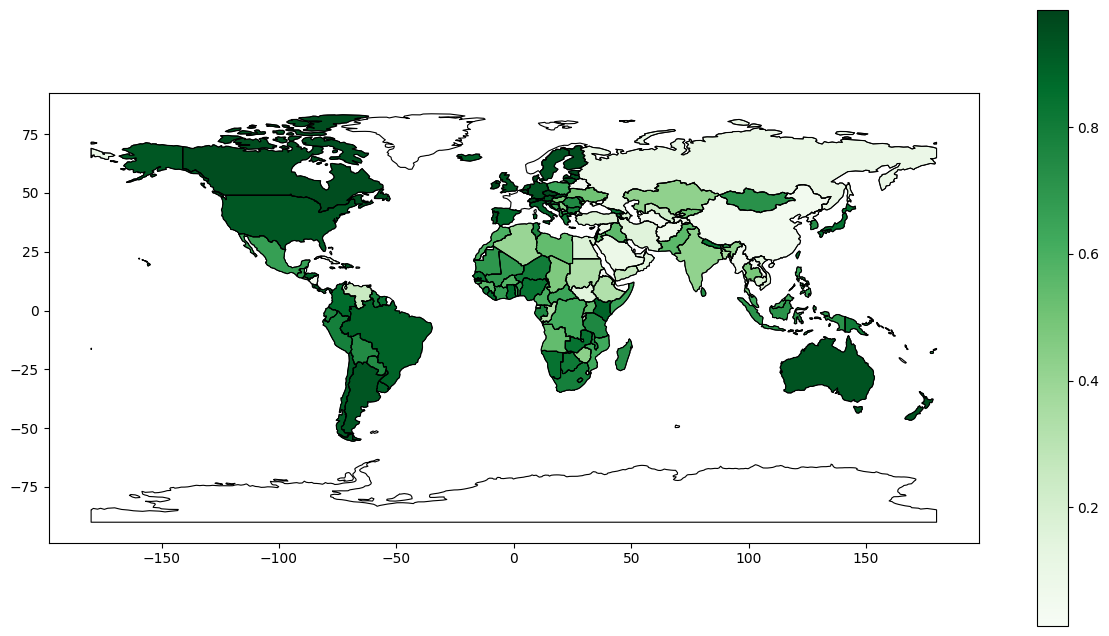

In [ ]:

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.8, color="black")
world.plot(column="Freedom_Index", cmap="Greens", linewidth=0.6, edgecolor="black", legend=True, ax=ax)


In [ ]:

# Titles and labels
ax.set_title("Freedom of Expression Index, 2023", fontsize=14)
ax.axis("off")  # Hide axes


(np.float64(-198.0),
 np.float64(198.00000000000006),
 np.float64(-98.6822565),
 np.float64(92.3273865))

In [ ]:

#finally
plt.show()